   label  type  site_admin  company   blog  location  hireable  \
0  Human  True       False    False  False     False     False   
1  Human  True       False    False   True     False      True   
2  Human  True       False     True   True      True      True   
3    Bot  True       False    False  False      True     False   
4  Human  True       False    False  False     False      True   

                                                 bio  public_repos  \
0                                                NaN            26   
1  I just press the buttons randomly, and the pro...            30   
2         Time is unimportant,\nonly life important.           103   
3                                                NaN            49   
4                                                NaN            11   

   public_gists  followers  following                 created_at  \
0             1          5          1  2011-09-26 17:27:03+00:00   
1             3          9          6  2015-06

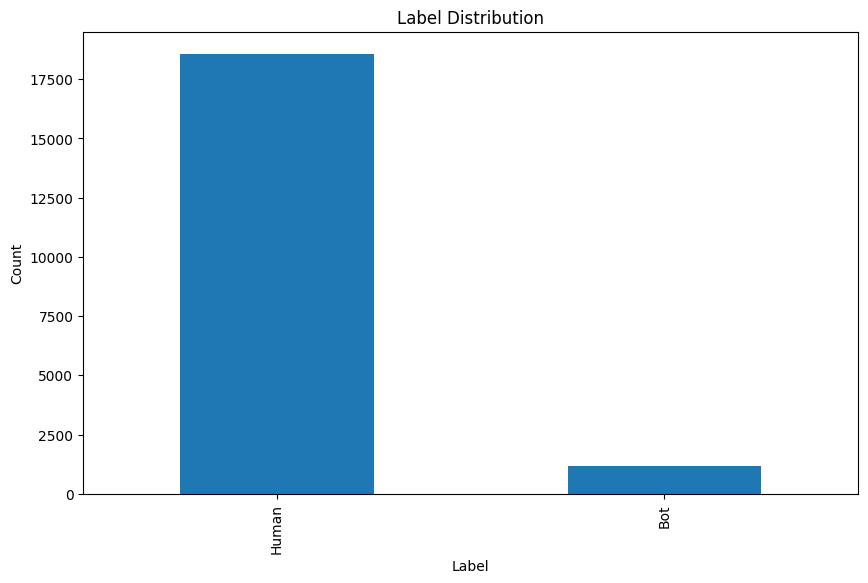

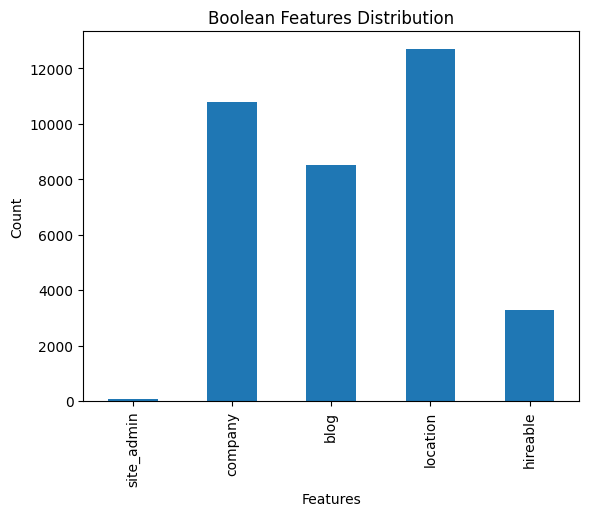

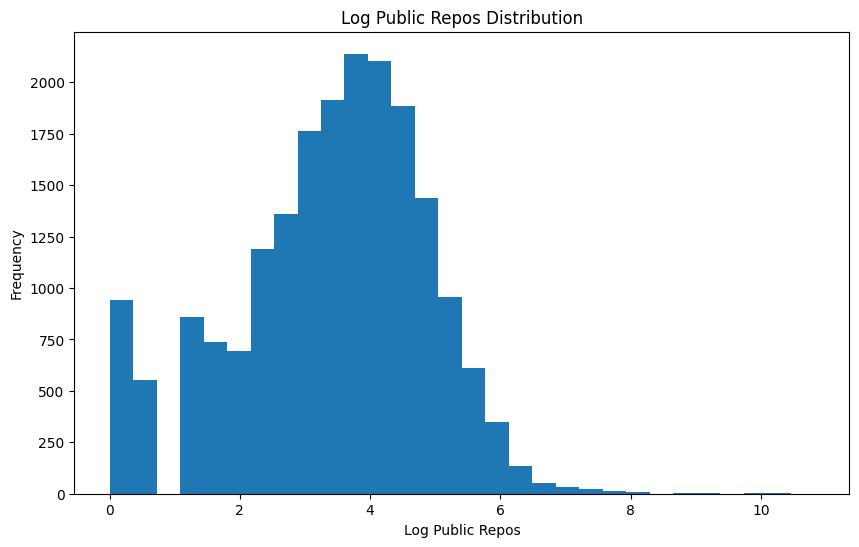

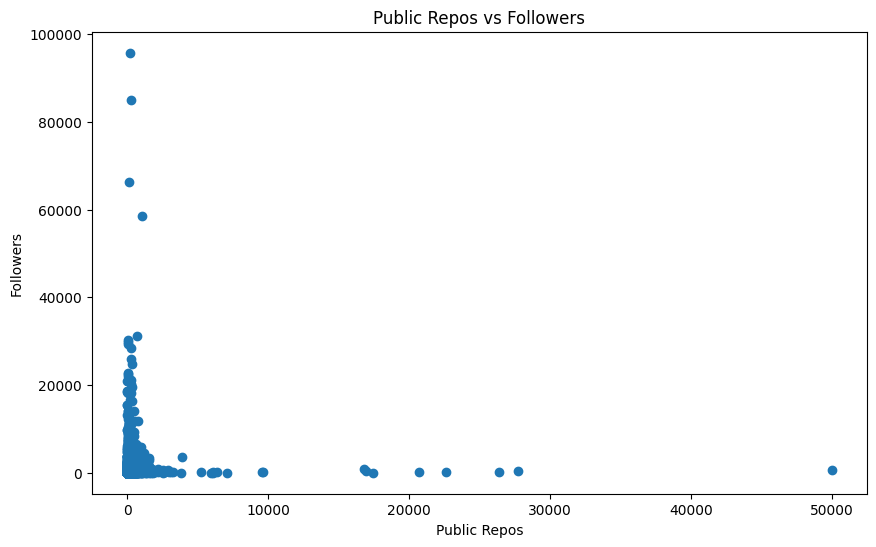

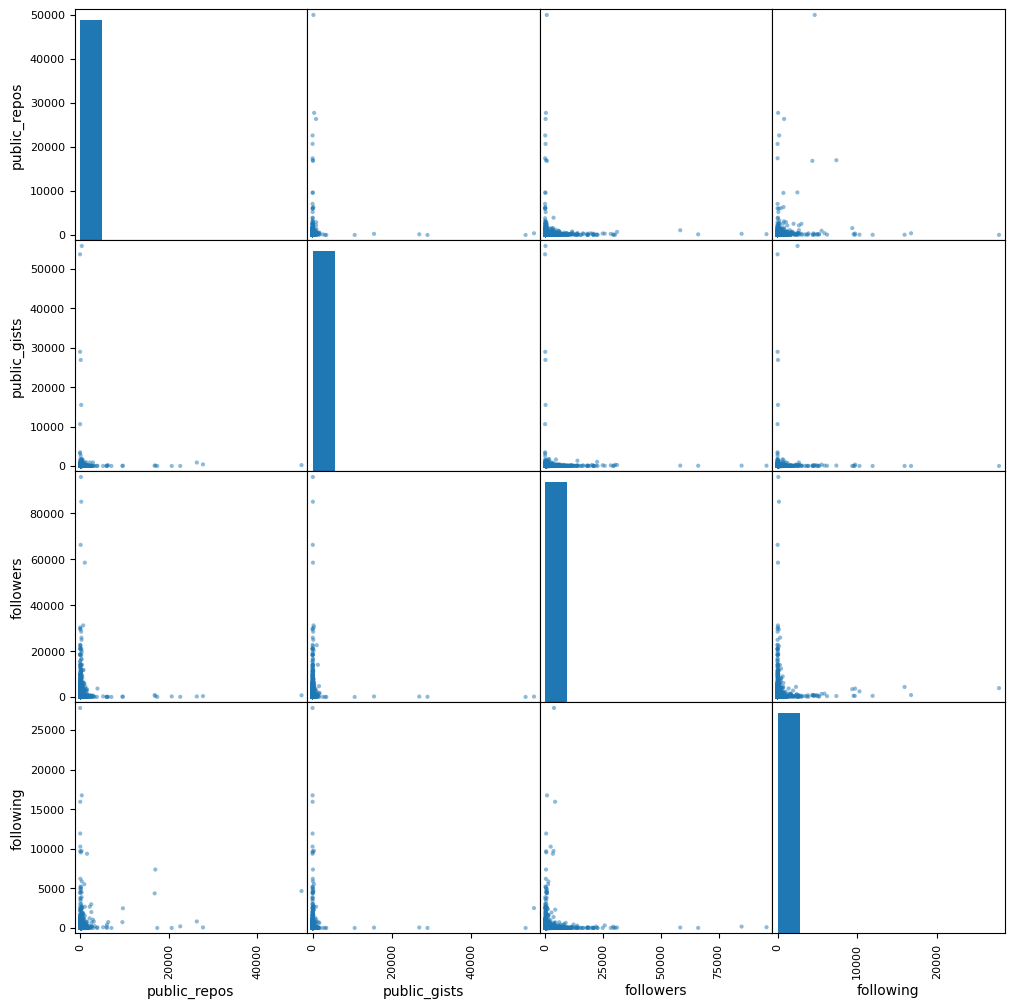

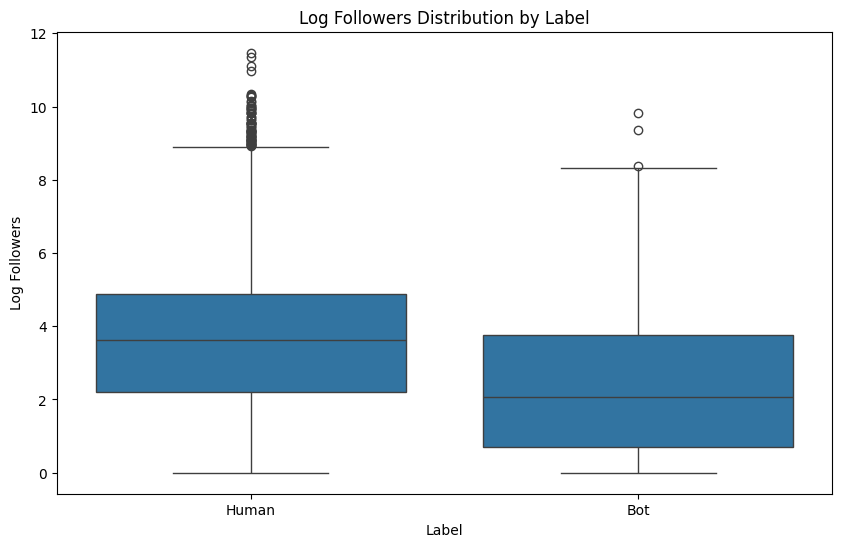

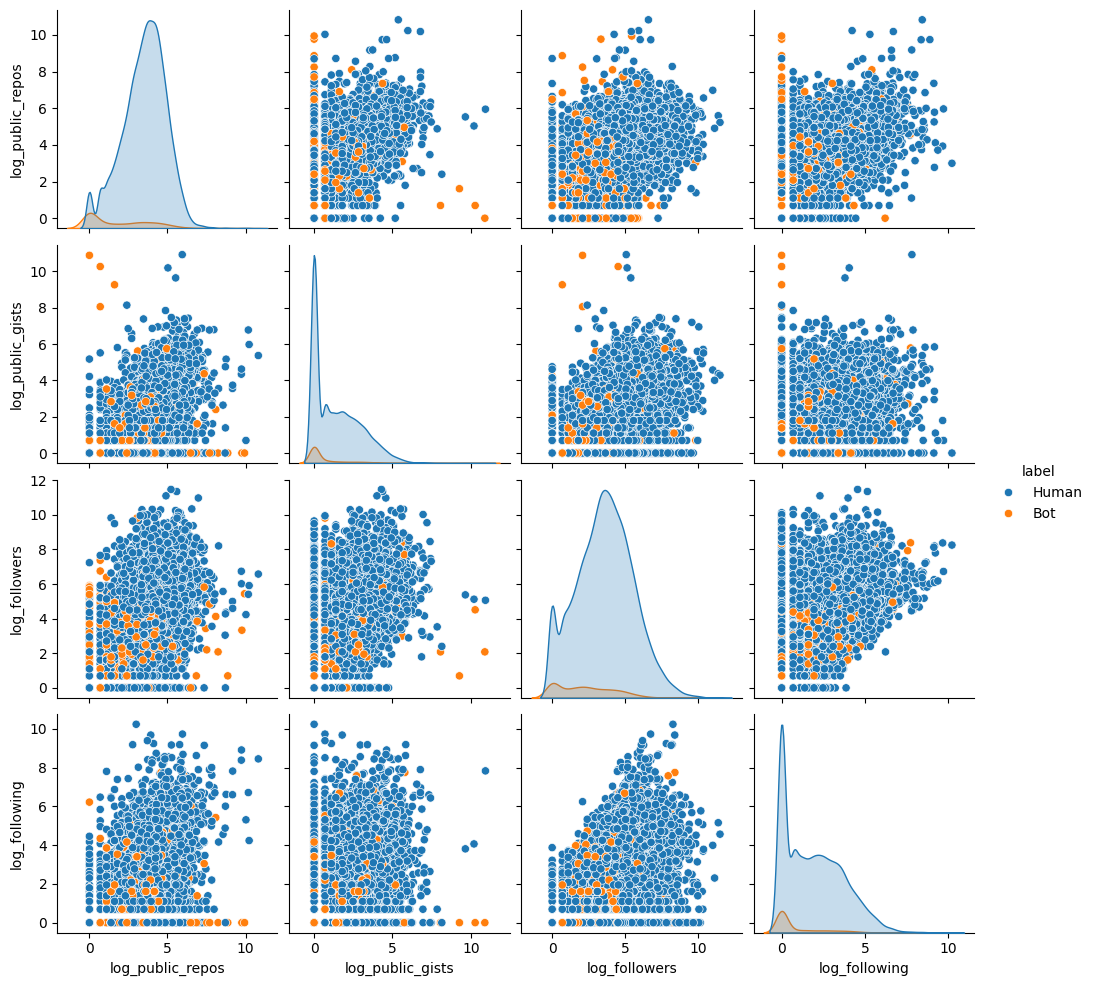

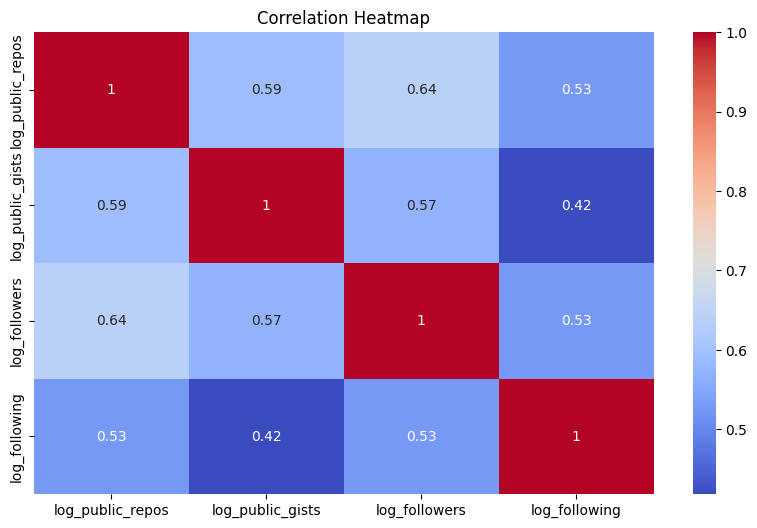

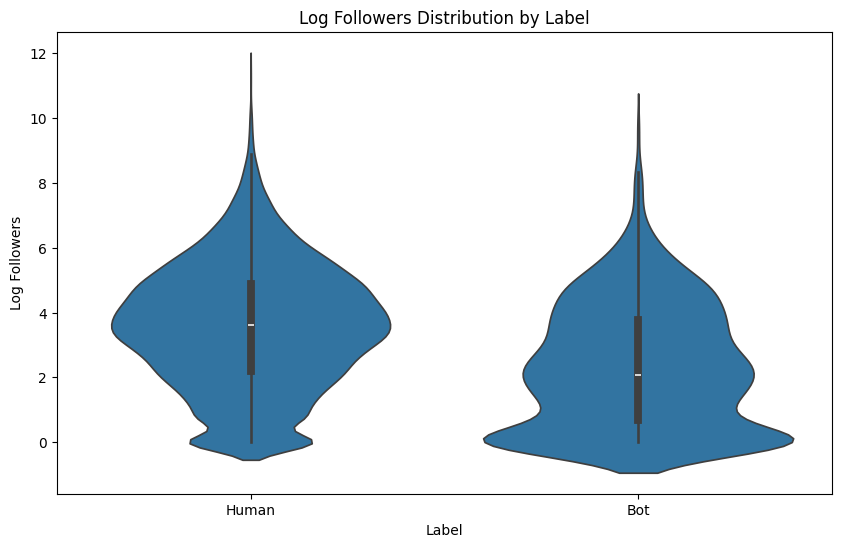

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from pandas_profiling import ProfileReport

# 设置显示选项以查看更多数据行和列
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# 读取数据集
data = pd.read_csv('github_bot_processed_data.csv')

# 使用head()方法查看数据的前几行
print(data.head())

# 使用info()方法查看每列的数据类型
print(data.info())

# 使用describe()方法生成数据的描述性统计信息
print(data.describe())

# 将日期列转换为日期时间格式
data['created_at'] = pd.to_datetime(data['created_at'])
data['updated_at'] = pd.to_datetime(data['updated_at'])

# 展示日期格式化效果
print(data[['created_at', 'updated_at']].head())

# 对public_repos、public_gists、followers、following等列进行对数变换
data['log_public_repos'] = np.log1p(data['public_repos'])
data['log_public_gists'] = np.log1p(data['public_gists'])
data['log_followers'] = np.log1p(data['followers'])
data['log_following'] = np.log1p(data['following'])

# 查看对数变换后的数据
print(data[['log_public_repos', 'log_public_gists', 'log_followers', 'log_following']].head())

# 绘制条形图：展示label列的类别分布
plt.figure(figsize=(10, 6))
data['label'].value_counts().plot(kind='bar')
plt.title('Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

# 绘制堆积柱状图：展示多个布尔特征（如site_admin、company等）的分布
bool_features = ['site_admin', 'company', 'blog', 'location', 'hireable']
data[bool_features].astype(int).sum().plot(kind='bar', stacked=True)
plt.title('Boolean Features Distribution')
plt.xlabel('Features')
plt.ylabel('Count')
plt.show()

# 绘制直方图：展示log_public_repos的对数变换后的数据分布
plt.figure(figsize=(10, 6))
data['log_public_repos'].plot(kind='hist', bins=30)
plt.title('Log Public Repos Distribution')
plt.xlabel('Log Public Repos')
plt.ylabel('Frequency')
plt.show()

# 绘制散点图：展示public_repos与followers之间的关系
plt.figure(figsize=(10, 6))
plt.scatter(data['public_repos'], data['followers'])
plt.title('Public Repos vs Followers')
plt.xlabel('Public Repos')
plt.ylabel('Followers')
plt.show()

# 绘制散点矩阵：展示多个数值型特征之间的成对关系
pd.plotting.scatter_matrix(data[['public_repos', 'public_gists', 'followers', 'following']], figsize=(12, 12))
plt.show()

# 绘制箱线图：展示不同label类别下log_followers的分布
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='log_followers', data=data)
plt.title('Log Followers Distribution by Label')
plt.xlabel('Label')
plt.ylabel('Log Followers')
plt.show()

# 绘制成对图：展示不同特征之间的成对关系，并根据label分类
sns.pairplot(data[['log_public_repos', 'log_public_gists', 'log_followers', 'log_following', 'label']], hue='label')
plt.show()

# 绘制热图：展示log_public_repos、log_public_gists、log_followers和log_following等特征之间的相关性
plt.figure(figsize=(10, 6))
sns.heatmap(data[['log_public_repos', 'log_public_gists', 'log_followers', 'log_following']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# 绘制小提琴图：展示label与log_followers之间的分布差异
plt.figure(figsize=(10, 6))
sns.violinplot(x='label', y='log_followers', data=data)
plt.title('Log Followers Distribution by Label')
plt.xlabel('Label')
plt.ylabel('Log Followers')
plt.show()

# 使用pandas_profiling生成交互式数据分析报告
#profile = ProfileReport(data, title="GitHub Bot Processed Data Report", explorative=True)
#profile.to_file("github_bot_processed_data_report.html")

pandas_profiling库安装一直不行，和别的库冲突啥的